# Content
- Overview
- Imports
- Load the Data
- Text to datatime
- Set Index
- Setting the Frequency
- Handling Missing values
- Simplify the Dataset
- Split the Data
- ACF
- PACF

# Overview
- We will learn to apply Autoregressive Model on a Time Series Dataset to predict future values

# Imports

In [27]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visulization
import matplotlib.pyplot as plt

# ACF and PACF plots
import statsmodels.graphics.tsaplots as sgt

# AR Model
from statsmodels.tsa.arima_model import ARMA

# Load the Data

In [2]:
raw_data_csv = pd.read_csv('Index2018.csv')

In [3]:
df_comp = raw_data_csv.copy()

In [4]:
df_comp.head()

,Date,spx,dax,ftse,nikkei
0,1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1,1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
2,1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
3,1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
4,1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


# Text to datetime

In [8]:
df_comp['Date'] = pd.to_datetime(df_comp['Date'], dayfirst=True)

In [10]:
df_comp['Date'].describe()

count                    6277
unique                   6277
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: Date, dtype: object

# Set Index

In [11]:
df_comp.set_index('Date',inplace=True)

In [12]:
df_comp.head()

,spx,dax,ftse,nikkei
Date,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


# Setting the Frequency

In [13]:
df_comp = df_comp.asfreq('b')

In [14]:
df_comp.head()

,spx,dax,ftse,nikkei
Date,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


# Handling Missing

In [16]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [17]:
# We have no missing values after setting the frequency as business days

In [15]:
# Lets work only on ftse market values, so we'll drop all other columns

# Simplify the Dataset

In [18]:
df_comp.drop(['spx','dax','nikkei'], axis=1, inplace=True)

In [19]:
df_comp.head()

,ftse
Date,
1994-01-07,3446.000000
1994-01-10,3440.600098
1994-01-11,3413.800049
1994-01-12,3372.000000
1994-01-13,3360.000000


# Split the Data

In [20]:
size = int(len(df_comp['ftse'])*0.8)

In [22]:
df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

# ACF

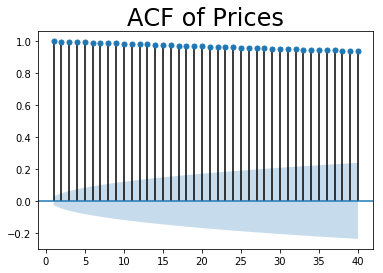

In [24]:
sgt.plot_acf(df_train['ftse'], zero=False, lags=40)
plt.title("ACF of Prices", size=24)
plt.show()

# PACF

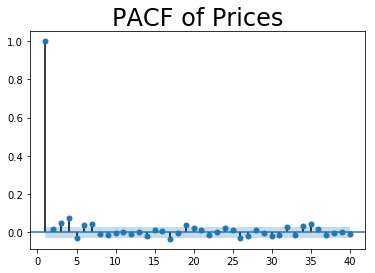

In [26]:
sgt.plot_pacf(df_train['ftse'], zero=False, lags=40, alpha=0.05, method=('ols'))
plt.title("PACF of Prices", size=24)
plt.show()

# AR(1) Model

In [28]:
model_ar = ARMA(df_train['ftse'], order=(1,0))

In [29]:
result_ar = model_ar.fit()

In [30]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27623.865
Method:                       css-mle   S.D. of innovations             59.273
Date:                Sun, 29 Mar 2020   AIC                          55253.730
Time:                        21:37:33   BIC                          55273.294
Sample:                    01-07-1994   HQIC                         55260.586
                         - 04-05-2013                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5043.8573    486.703     10.363      0.000    4089.938    5997.777
ar.L1.ftse     0.9985      0.001   1298.375      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""